# Solving a Regression Problem using ANN

In [74]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
housing=fetch_california_housing()

In [76]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [77]:
housing.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [78]:
X=pd.DataFrame(housing.data, columns=housing.feature_names)

In [79]:
y=pd.DataFrame(housing.target, columns=["target"])

In [80]:
X.shape

(20640, 8)

In [81]:
y.shape

(20640, 1)

In [82]:
X.drop(["Latitude","Longitude"],axis=1,inplace=True) #not relevant

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,random_state=42)


In [84]:
X_train.shape

(11610, 6)

In [85]:
X_test.shape

(5160, 6)

In [86]:
X_valid.shape

(3870, 6)

#Creating model

In [87]:
Layers=[
    tf.keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1)
]

In [88]:
model=tf.keras.models.Sequential(Layers) #we get model object

# Compiling the model

In [89]:
LOSS="mse"
OPTIMIZER="sgd"
model.compile(optimizer=OPTIMIZER,loss=LOSS)


In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                210       
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
 dense_15 (Dense)            (None, 5)                 55        
                                                                 
 dense_16 (Dense)            (None, 1)                 6         
                                                                 
Total params: 581 (2.27 KB)
Trainable params: 581 (2.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
#scaling data

In [92]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train) # we calc mean and Standard deviation and apply to each input
X_valid=scaler.transform(X_valid) # we dont recalculate mean and standard deviation we use the same mean and SD as of training we just apply to each input
X_test=scaler.transform(X_test)



# Training model

In [93]:
EPOCHS = 20

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.5511 - val_loss: 2.1446
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8450 - val_loss: 1.1685
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5876 - val_loss: 0.5091
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5114 - val_loss: 0.4838
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4781 - val_loss: 0.4806
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4621 - val_loss: 0.4714
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4478 - val_loss: 0.4588
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4462 - val_loss: 0.4515
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4385 - val_loss: 0.4177
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4324 - val_loss: 0.4114

<Axes: >

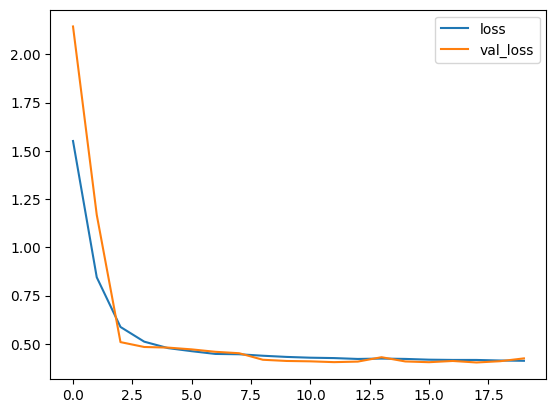

In [94]:
pd.DataFrame(history.history).plot() #why fluctuations, what do they mean

In [95]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4388


0.4387683570384979

In [96]:
X_test.shape

(5160, 6)

In [97]:
new = X_test[0]

In [98]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [99]:
new.shape

(6,)

In [100]:
X_test[0]

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735])

In [102]:
new.reshape((1,6))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735]])

# Model with callback

In [103]:
model_2 = tf.keras.models.Sequential(Layers)

LOSS = "mse"
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(loss=LOSS , optimizer=OPTIMIZER)

EPOCHS = 20

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


history = model_2.fit(X_train, y_train, epochs = EPOCHS, validation_data=(X_valid, y_valid), callbacks = CALLBACKS)

Epoch 1/20
363/363 [==============================] - 4s 8ms/step - loss: 0.4075 - val_loss: 0.4012
Epoch 2/20
 30/363 [=>............................] - ETA: 1s - loss: 0.4321

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 3ms/step - loss: 0.4046 - val_loss: 0.3992
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4046 - val_loss: 0.3998
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4042 - val_loss: 0.3993
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4041 - val_loss: 0.4000
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4038 - val_loss: 0.3968
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4036 - val_loss: 0.3935
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4035 - val_loss: 0.3924
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - val_loss: 0.3929
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4031 - val_loss: 0.3923
Epoch 11/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4029 - val_loss: 0.3918
Epoch 12/

In [104]:
%load_ext tensorboard

In [105]:
%tensorboard --logdir="logs"

<IPython.core.display.Javascript object>